In [1]:
!git clone https://github.com/shreyjain711/wm-tango.git

Cloning into 'wm-tango'...
remote: Enumerating objects: 3963, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 3963 (delta 172), reused 131 (delta 131), pack-reused 3766 (from 1)
Receiving objects: 100% (3963/3963), 412.15 MiB | 48.29 MiB/s, done.
Resolving deltas: 100% (1088/1088), done.
Updating files: 100% (2420/2420), done.


In [2]:
%cd '/home/ec2-user/SageMaker/wm-tango'
!pwd

/home/ec2-user/SageMaker/wm-tango
/home/ec2-user/SageMaker/wm-tango


In [3]:
!pip install setuptools==70.3.0
!pip install -r requirements.txt --quiet
!pip install jax==0.4.23 --quiet
!pip install jaxlib==0.4.23 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.1/931.1 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.10 requires mkl, which is not installed.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.
spyder 6.0.1 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 8.12.0 which is incompatible.
spyder-kernels 3.0.0 requires ipython!=8.17.1,<9,>=8.13.0; python_version > "3.8", but you have ipython 8.12.0 which is incompatible.
yapf 0.40.1 requires importlib-metadata>=6.6.0, but you have importlib-metadata 6.3.0 which is incompatible.


In [4]:
# Environmental Sounds
prompt_1 = "Rain falling softly on a tin roof during a quiet night"
prompt_2 = "Waves crashing gently on a sandy beach"

# Human Actions
prompt_3 = "A crowd cheering and clapping at a concert"
prompt_4 = "Footsteps echoing in a large empty hallway"

# Musical or Instrumental Sounds
prompt_5 = "A piano playing a calm and soft melody in a quiet room"
prompt_6 = "An acoustic guitar being strummed near a campfire"

# Animal Sounds
prompt_7 = "Birds chirping in a dense forest at sunrise"
prompt_8 = "A dog barking excitedly in a backyard"

# Urban and Cityscapes
prompt_9 = "The hum of traffic on a busy city street"
prompt_10 = "Construction sounds with hammering and drilling"

prompts = [prompt_1, prompt_2, prompt_3, prompt_4, prompt_5, prompt_6, prompt_7, prompt_8, prompt_9, prompt_10]

In [5]:
import IPython
import soundfile as sf
from tango import Tango

tango = Tango("declare-lab/tango2")

# for c in [0, 1, 2, 3, 4, 5, 6, 7, -1]:
#     for n in [1, 2, 3, 4, 5, 6, 7, 8]:
#         for p_num, prompt in enumerate(prompts):
#             print(f"generating channel:{c} num-stumps:{n} prompt: {prompt}")
#             audio1 = tango.generate(prompt, wm_flag=True, wm_nums=n, wm_channel=c, debug_mode=True)
#             sf.write(f"generated_samples/wm_p{p_num+1}_n{n}_c{c}.wav", audio1, samplerate=16000)

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:42: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/ec2-user/SageMaker/wm-tango/audioldm/audio/stft.py:151: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=64, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


UNet initialized randomly.


Some weights of the model checkpoint at google/flan-t5-large were not used when initializing T5EncoderModel: ['decoder.block.9.layer.1.EncDecAttention.k.weight', 'decoder.block.13.layer.2.layer_norm.weight', 'decoder.block.18.layer.0.SelfAttention.o.weight', 'decoder.block.23.layer.1.layer_norm.weight', 'decoder.block.18.layer.2.layer_norm.weight', 'decoder.block.4.layer.1.EncDecAttention.o.weight', 'decoder.block.2.layer.2.DenseReluDense.wo.weight', 'decoder.block.10.layer.1.EncDecAttention.k.weight', 'decoder.block.22.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.8.layer.1.EncDecAttention.k.weight', 'decoder.block.22.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.20.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.12.layer.0.SelfAttention.q.weight', 'decoder.block.14.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.4.layer.1.EncDecAttention.v.weight', 'decoder.block.22.layer.1.EncDecAttention.k.weight', 'decoder.block.15.layer

Successfully loaded checkpoint from: declare-lab/tango2


In [ ]:
for p_num, prompt in enumerate(prompts):
    audio1 = tango.generate(prompt, wm_flag=False)
    sf.write(f"generated_samples/no_wm/p{p_num+1}/audio.wav", audio1, samplerate=16000)

In [ ]:
load_audio('generated')
IPython.display.Audio(data=audio1, rate=16000)

In [ ]:
IPython.display.Audio(data=audio2, rate=16000)

Mean Squared Error (Time Domain): 0.015580907464027405
Mean Absolute Difference (Frequency Domain): 10.408509558505218
Euclidean Distance: 50.52993392944336


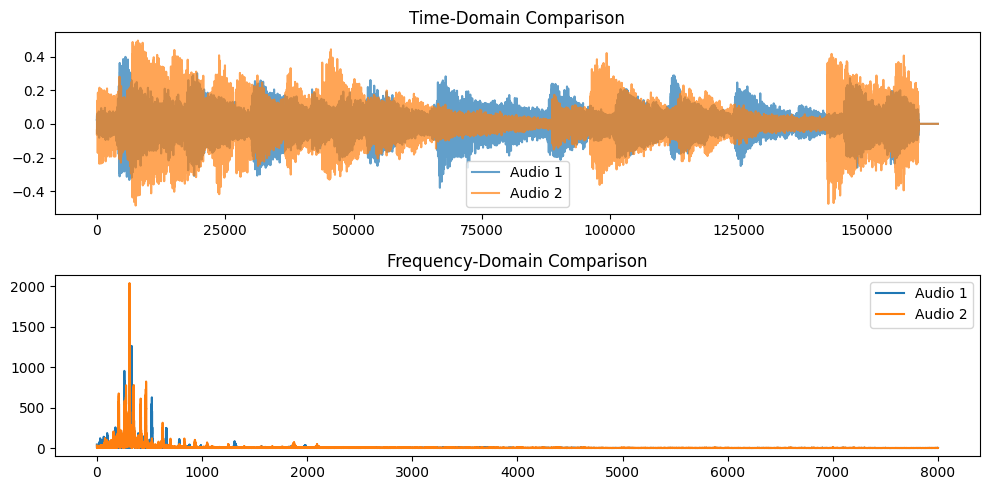

The two audio files are significantly different.


In [30]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


def load_audio(file_path):
    """Load audio file using librosa."""
    audio, sr = librosa.load(file_path, sr=None)  # Load audio with native sampling rate
    return audio, sr


def compare_audio_signals(audio1, audio2):
    """Compare two audio signals and compute their differences."""
    # Ensure the signals have the same length
    min_length = min(len(audio1), len(audio2))
    audio1 = audio1[:min_length]
    audio2 = audio2[:min_length]

    # Compute time-domain difference (Mean Squared Error)
    mse = np.mean((audio1 - audio2) ** 2)

    # Compute frequency-domain difference
    fft1 = np.fft.fft(audio1)
    fft2 = np.fft.fft(audio2)
    frequency_diff = np.mean(np.abs(fft1 - fft2))

    # Compute Euclidean distance as an additional metric
    euclidean_distance = euclidean(audio1, audio2)

    return mse, frequency_diff, euclidean_distance


def visualize_difference(audio1, audio2, sr):
    """Visualize the differences in the time and frequency domains."""
    # Time-domain visualization
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(audio1, label="Audio 1", alpha=0.7)
    plt.plot(audio2, label="Audio 2", alpha=0.7)
    plt.title("Time-Domain Comparison")
    plt.legend()

    # Frequency-domain visualization
    fft1 = np.abs(np.fft.fft(audio1))
    fft2 = np.abs(np.fft.fft(audio2))
    freqs = np.fft.fftfreq(len(audio1), d=1 / sr)

    plt.subplot(2, 1, 2)
    plt.plot(freqs[: len(freqs) // 2], fft1[: len(freqs) // 2], label="Audio 1")
    plt.plot(freqs[: len(freqs) // 2], fft2[: len(freqs) // 2], label="Audio 2")
    plt.title("Frequency-Domain Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Test function
def test_audio_difference(file1, file2):
    """Test for difference between two audio files."""
    audio1, sr1 = load_audio(file1)
    audio2, sr2 = load_audio(file2)
    
    

    if sr1 != sr2:
        raise ValueError("Sampling rates of the two audio files do not match!")

    mse, freq_diff, euclidean_dist = compare_audio_signals(audio1, audio2)
    print(f"Mean Squared Error (Time Domain): {mse}")
    print(f"Mean Absolute Difference (Frequency Domain): {freq_diff}")
    print(f"Euclidean Distance: {euclidean_dist}")

    visualize_difference(audio1, audio2, sr1)

    # Return True if significant difference is found
    
    
    return (mse > 1e-6 or freq_diff > 1e-6), audio1, audio1


# Example usage

file1 = "generated_samples/no_wm_p5_n5_c-1.wav"  # Replace with the path to your first audio file
file2 = "generated_samples/wm_p5_n5_c-1.wav"  # Replace with the path to your second audio file

significant_difference, audio1, audio2 = test_audio_difference(file1, file2)
if significant_difference:
    print("The two audio files are significantly different.")
else:
    print("The two audio files are nearly identical.")

In [31]:
IPython.display.Audio(data=audio1, rate=16000)

In [32]:
IPython.display.Audio(data=audio2, rate=16000)

In [ ]:
!git add .
!git commit -m "watermarked inference experiment code added"

In [ ]:
!git config --global user.name "Shrey Jain"
!git config --global user.email shrey.jain711@gmail.com

!git config --global credential.helper store
!git remote set-url origin git@github.com:shreyjain711/wm-tango.git
!git config --global credential.helper cache --timeout=3600

In [ ]:
!git push

In [ ]:
audio1 = tango.generate(prompt, wm_flag=True, wm_nums=n, wm_channel=c, debug_mode=True)